# Clustering

### Dimensionality Reduction & LSA

In [39]:
import numpy as np
import scipy as sp
import pandas as pd
import json as js
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Read report
data = pd.read_csv("02-ASRS_DBOnline.csv",index_col=0).reset_index()
data = data.dropna(subset=['Place.3','Place.5','Report 1.2']).reset_index()[1:]
new_report = pd.read_csv("02-report.csv", index_col=0)
new_report.head()

,Summary
0,synopsi narr
1,helicopt encount sma acft IN see avoid situat ...
2,close prox ga-sma ga-smt ON v106 . level AT 45...
3,close prox 2 ga-sma acft IN traffic pattern AT...
4,close prox GA sma parachutist IN restrict area...


In [42]:
# Word reference
word_reference = pd.read_csv("02-ASRS-word-reference.csv", index_col=0)
def lookup(word):
    for i in range(len(word_reference)):
        if word_reference['after'][i] == word:
            print(word_reference['before'][i])
            break

In [43]:
lookup('arpt')

ARPTS


In [44]:
# Tfid Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(728, 1779)


In [45]:
# Decide n_components
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components=100, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

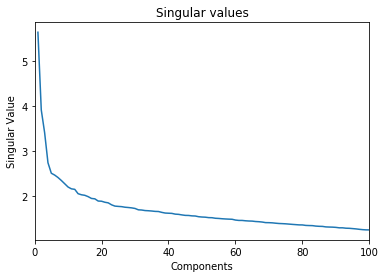

In [46]:
s = svd.singular_values_
plt.xlim([0,100])
plt.plot(range(1,len(s)+1),s)
plt.title('Singular values')
plt.ylabel('Singular Value')
plt.xlabel('Components')

### decide n_components

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale

In [48]:
# Tfid Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)
dtm = vectorizer.fit_transform(new_report['Summary'])
print(dtm.shape)
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
terms = vectorizer.get_feature_names()

(728, 1779)


In [49]:
svd = TruncatedSVD(n_components=10, algorithm="randomized")
svd_fit = svd.fit_transform(centered_dtm)
svd_norm = Normalizer().fit_transform(svd_fit)

vt = svd.components_
dfnorm = pd.DataFrame(svd_norm)

In [50]:
order_components = vt.argsort()[:, ::-1]
components = []
for i in range(vt.shape[0]):
    label = [terms[ind] for ind in order_components[i, :10]]
    components.append(label)
dfnorm.columns = components
dfnorm.head()

,accid,failur,flight,board,determin,probabl,caus,safeti,nation,transport
,tcasii,ft,ra,clb,atc,tfc,visual,accid,dscnt,ta
,acr,sector,issu,radar,ctlr,separ,error,hold,sep,hdg
,acr,rwi,twr,turn,tcasii,downwind,apch,final,deg,ra
,aircraft,sma,traffic,smt,tower,runway,approach,clock,hdg,atc
,aircraft,pattern,approach,downwind,runway,tower,traffic,visual,base,twr
,sma,ra,tcasii,rptr,pattern,acr,final,alt,radar,sight
,apch,approach,aircraft,il,ctl,pvd,runway,vector,ra,tower
,acft,turn,tcasii,deg,hdg,ra,approach,crew,smt,lgt
,tfc,apch,sector,visual,smt,ctlr,bdl,zbw,clb,jet
0,0.698715,-0.270926,0.192131,-0.316698,0.215326,0.180892,0.232811,0.087814,-0.388763,0.095124


In [51]:
print(components)

[['accid', 'failur', 'flight', 'board', 'determin', 'probabl', 'caus', 'safeti', 'nation', 'transport'], ['tcasii', 'ft', 'ra', 'clb', 'atc', 'tfc', 'visual', 'accid', 'dscnt', 'ta'], ['acr', 'sector', 'issu', 'radar', 'ctlr', 'separ', 'error', 'hold', 'sep', 'hdg'], ['acr', 'rwi', 'twr', 'turn', 'tcasii', 'downwind', 'apch', 'final', 'deg', 'ra'], ['aircraft', 'sma', 'traffic', 'smt', 'tower', 'runway', 'approach', 'clock', 'hdg', 'atc'], ['aircraft', 'pattern', 'approach', 'downwind', 'runway', 'tower', 'traffic', 'visual', 'base', 'twr'], ['sma', 'ra', 'tcasii', 'rptr', 'pattern', 'acr', 'final', 'alt', 'radar', 'sight'], ['apch', 'approach', 'aircraft', 'il', 'ctl', 'pvd', 'runway', 'vector', 'ra', 'tower'], ['acft', 'turn', 'tcasii', 'deg', 'hdg', 'ra', 'approach', 'crew', 'smt', 'lgt'], ['tfc', 'apch', 'sector', 'visual', 'smt', 'ctlr', 'bdl', 'zbw', 'clb', 'jet']]


In [52]:
dfloc = pd.DataFrame(scale(data[['Place.3', 'Place.5']]), columns=['dis', 'alt'])
df_features = dfloc.join(dfnorm)
df_features['dis'] = df_features['dis'].apply(lambda x: x * 1)
df_features['alt'] = df_features['alt'].apply(lambda x: x * 1)
df_features.to_csv('03-lsa.csv')
df_features.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 10 on the right)
  warnings.warn(msg, UserWarning)


,dis,alt,"(accid, tcasii, acr, acr, aircraft, aircraft, sma, apch, acft, tfc)","(failur, ft, sector, rwi, sma, pattern, ra, approach, turn, apch)","(flight, ra, issu, twr, traffic, approach, tcasii, aircraft, tcasii, sector)","(board, clb, radar, turn, smt, downwind, rptr, il, deg, visual)","(determin, atc, ctlr, tcasii, tower, runway, pattern, ctl, hdg, smt)","(probabl, tfc, separ, downwind, runway, tower, acr, pvd, ra, ctlr)","(caus, visual, error, apch, approach, traffic, final, runway, approach, bdl)","(safeti, accid, hold, final, clock, visual, alt, vector, crew, zbw)","(nation, dscnt, sep, deg, hdg, base, radar, ra, smt, clb)","(transport, ta, hdg, ra, atc, twr, sight, tower, lgt, jet)"
0,-0.214551,-0.640337,0.698715,-0.270926,0.192131,-0.316698,0.215326,0.180892,0.232811,0.087814,-0.388763,0.095124
1,0.237947,-0.373952,-0.073246,-0.433928,-0.086574,-0.136080,0.379462,-0.396315,0.551869,-0.143439,0.022909,-0.391933
2,-0.458203,-0.866764,-0.188402,-0.428503,0.078485,-0.042453,0.548907,-0.613124,-0.103591,-0.034950,0.285445,0.047706
3,-0.005706,-0.507144,-0.154855,-0.688710,-0.308362,0.033762,-0.088708,0.011724,0.523388,-0.088111,0.237683,-0.243463
4,-0.458203,-0.733571,0.207274,-0.495869,-0.066562,-0.349022,0.461640,-0.027312,0.350012,-0.118426,-0.483673,-0.023964


Full forms of the above abbreviations:
1. 
2. 
3. 
4.
5.
1. aircaft, error, standard, system, separation, between, Less Than Standard Separation
2. control, boston air route traffic control center, experience, operator, at, separation, standard, feet
3. Traffic Alert and Collision Avoidance, to, alert, aircaft, Resolution Advisory, Less Than Standard Separation, assign, descdent
4. runways, on, aircraft, approach, experience, Less Than Standard Separation, operator, error
5. Resolution Advisory, Traffic Alert and Collision Avoidance, report, crew, aircraft, approach runway, control

1. Near mid air collision, , , Pattern
2. aircraft, error, standard, Near mid air collision,
3. separate, 
4.
5.

# Analysis

1. midair collision sma has pattern / less than standard separation system error oppuacied
2. aircarrier error standard midair collision / in separate standard aircraft
3. nmac operator 

# K-means

In [53]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1)
kmeans.fit_predict(df_features)
Kcentroids = kmeans.cluster_centers_
Klabels = kmeans.labels_
print('Kmeans++ clusters:', Klabels)

Kmeans++ clusters: [3 3 3 3 3 3 3 4 3 3 3 3 4 4 3 3 4 3 4 4 3 4 3 3 3 1 4 3 3 3 3 3 3 3 4 4 3
 1 3 3 1 1 1 3 3 3 3 3 1 3 2 2 3 3 3 1 4 3 4 4 3 3 4 4 4 3 4 1 3 3 3 4 4 3
 3 1 2 3 3 1 1 3 3 3 3 3 3 3 3 3 4 4 3 3 3 1 3 3 4 3 4 3 3 3 3 3 3 3 4 0 3
 3 3 3 4 4 4 4 4 2 4 3 3 3 4 4 4 3 3 4 4 3 1 3 4 0 0 4 4 0 3 3 0 3 0 4 0 0
 0 3 0 0 0 3 3 3 3 3 3 0 3 3 4 4 3 3 3 4 0 3 4 0 4 3 3 0 4 0 3 3 0 0 4 0 4
 0 0 3 3 0 3 0 4 4 0 0 0 1 0 4 0 0 0 4 0 3 3 0 4 0 4 0 3 0 3 0 0 3 0 3 4 0
 3 0 3 3 4 0 0 3 1 3 3 3 0 0 3 4 0 3 0 0 3 4 0 3 4 0 1 4 0 4 0 3 4 0 0 0 4
 0 3 3 0 0 3 4 0 3 0 0 0 3 3 0 0 3 1 3 3 4 0 3 3 3 3 0 3 3 0 3 0 3 4 0 0 0
 3 4 0 3 0 0 0 3 3 4 4 0 4 0 3 3 3 0 0 3 3 3 3 3 3 0 4 0 0 3 3 4 1 0 4 0 4
 4 4 4 1 0 4 0 3 0 3 3 3 4 0 3 0 3 0 3 3 3 4 4 4 4 0 4 0 0 3 3 0 0 4 0 3 4
 4 0 3 3 3 0 4 4 0 3 4 4 0 4 1 3 4 0 4 0 3 3 3 3 0 0 4 0 0 0 3 0 0 4 0 3 3
 3 0 3 3 4 0 0 1 4 4 0 3 3 4 0 4 1 3 0 0 3 3 3 1 3 3 3 0 0 4 0 4 0 0 0 1 0
 3 3 3 3 4 0 3 3 3 4 4 4 3 4 0 0 0 3 4 0 3 4 4 4 1 3 1 3 3 0 3 3 0 3 0 1 0
 3 0 3

In [54]:
# Name k clusters
Kasc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
Korder_centroids = Kasc_order_centroids[:,::-1]
Korder_centroids = np.array([[x - 2 for x in row if (x - 2) >= 0] for row in Korder_centroids]) # remove locations

Kcluster_names = []
for i in range(k):
    label = [components[ind] for ind in Korder_centroids[i, :2]]
    Kcluster_names.append(label)

In [55]:
def find_report(cluster_num):
    report = [data.iloc[i]['Report 1.2'] for i in range(len(Klabels)) if Klabels[i] == cluster_num]
    print(report)
find_report(0)

['ACFT ON A CONTACT APCH TO THE ARPT CAME CLOSE TO A DEPARTING ACFT WHILE EXECUTING A MISSED APCH.', 'ACR X NON ADHERENCE TO ATC CLRNC BECAUSE OF TCASII TA. PLTDEV.', 'NMAC.', 'CPR OVERTAKES SMA JUST ENTERING ATA. NO TFC ADVISORIES.', 'ACR Y HAD LTSS FROM SMA X. SYS ERROR.', 'SMA HAS NMAC WHILE OVERFLYING TCA.', 'ACR MLG REVERSED CLB AND DSCNT 2500 FT IN RESPONSE TO TCASII RA.', 'TFC ADVISORY GIVEN BUT WRONG TFC SIGHTED. TCASII RA CAUSED FLC TO CLB UNTIL TCASII ANNOUNCED CLR OF TFC.', 'FLC OF MLG CLBING OUT OF HVN HAD TFC CONFLICT WITH SMA LIGHT ACFT FLYING OVERHEAD.', 'ACR X NON ADHERENCE TO ATC CLRNC RESPONDED TO TCASII RA STOPPED DSCNT AND CLBED. PLTDEV.', 'TCASII RA DICTATED CLB TO AVOID TFC.', 'NMAC WITH SAME DIRECTION TFC.', 'ACR X HAD LTSS FROM SMT Y. SYS ERROR. TCASII TA RA.', 'GOV LTT GETS IN PROX TO OTHER TFC IN VFR DSCNT PROC IN PROX OF CLOUDS.', 'APCH CTLR UNAUTHORIZED UNCOORD PENETRATION OF AIRSPACE WITH ATX Y HAD LTSS WITH ATX X. SYS ERROR.', 'CAPT OF MDT ACR ACFT RESPOND

In [37]:
find_report(1)

['ACR CLIMBED THROUGH ALT OCCUPIED BY ANOTHER ACFT.', 'ACR BEING VECTORED WAS ISSUED AN IMMEDIATE DESCENT BECAUSE OF CONFLICTING TRAFFIC.', 'ACR CONFLICTED WITH ANOTHER ACFT AT THE SAME ALT.', 'ACR WAS CLEARED INTO THE HOLDING PATTERN AT THE SAME ALT ASSIGNED TO ANOTHER ACR.', 'ACR DEVIATING AROUND WX CAME IN CLOSE PROX TO ANOTHER ACR OVER THE OCEAN.', 'ACR DEVIATING FOR WX OVER THE OCEAN CONFLICTED WITH ANOTHER ACR AT THE SAME ALT.', 'ACR WDB EXPERIENCED LESS THAN STANDARD SEPARATION WITH ANOTHER ACFT WHILE IN DESCENT ON RADAR VECTOR.', 'ACR Y HAD LESS THAN STANDARD SEPARATION FROM ACR X. SYSTEM ERROR.', 'ACR X HAD LESS THAN STANDARD SEPARATION FROM ACR Y. SYSTEM ERROR.', 'WHILE BEING VECTORED BY ZBW; ACR LGT WAS ADVISED OF A CONFLICT ALERT AND TO TURN IMMEDIATELY AND DESCEND FOR TRAFFIC AVOIDANCE.', 'ACR Y HAD LESS THAN STANDARD SEPARATION FROM BMB X FLT. SYSTEM ERROR.', "MDT JET AT 41000' MSL WAS TOO HIGH FOR ACFT CAPABILITY. AIRSPEED DECAYED. ACFT BUFFET ENSUED. ACFT HAD TO DESCEND

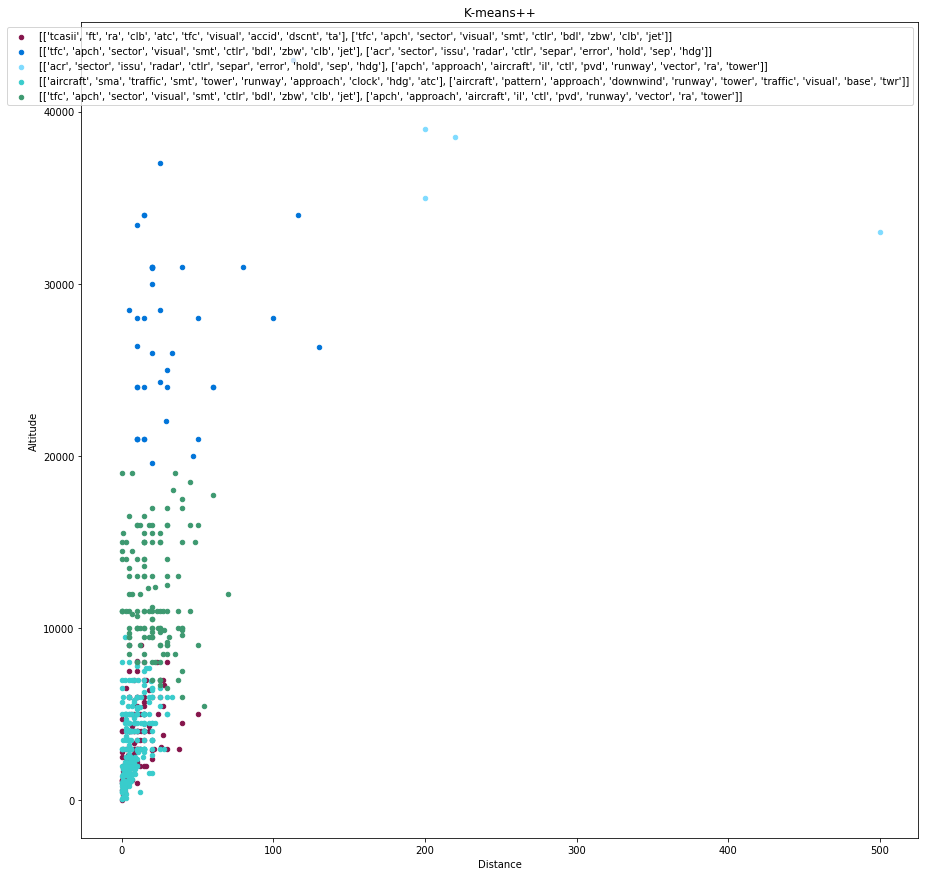

In [56]:
# Plot k-means++
plt.figure(figsize=(15, 15))
colors = ['#85144b', '#0074D9', '#7FDBFF', '#39CCCC', '#3D9970', '#2ECC40', '#01FF70', '#FFDC00', '#FF851B', '#FF4136', '#AAAAAA', '#222222']

for cluster_index in range(k):
    alt = [data.iloc[i]['Place.5'] for i in range(len(Klabels)) if Klabels[i] == cluster_index]
    dis = [data.iloc[i]['Place.3'] for i in range(len(Klabels)) if Klabels[i] == cluster_index]
    plt.scatter(x=dis, y=alt, c=colors[cluster_index], label = Kcluster_names[cluster_index], s=20)

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('K-means++')
plt.show()